In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

In [2]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
#adding population data

population_data = { "United States of America" :331002651 ,
                    "China" : 1439323776, 
                    "Germany" : 83783942, 
                    "Chile" : 19116201,
                    "Mexico" :  128932753,
                    "Zimbabwe" : 14862924}

df['population'] = df["Country"].apply(lambda country: population_data[country])
df['gdp_per_capita'] = df['GDP']/df['population']
df.head()

,Country,Year,Life expectancy at birth (years),GDP,population,gdp_per_capita
0,Chile,2000,77.3,7.786093e+10,19116201,4073.033766
1,Chile,2001,77.3,7.097992e+10,19116201,3713.076880
2,Chile,2002,77.8,6.973681e+10,19116201,3648.047613
3,Chile,2003,77.9,7.564346e+10,19116201,3957.034132
4,Chile,2004,78.0,9.921039e+10,19116201,5189.859264


<AxesSubplot:>

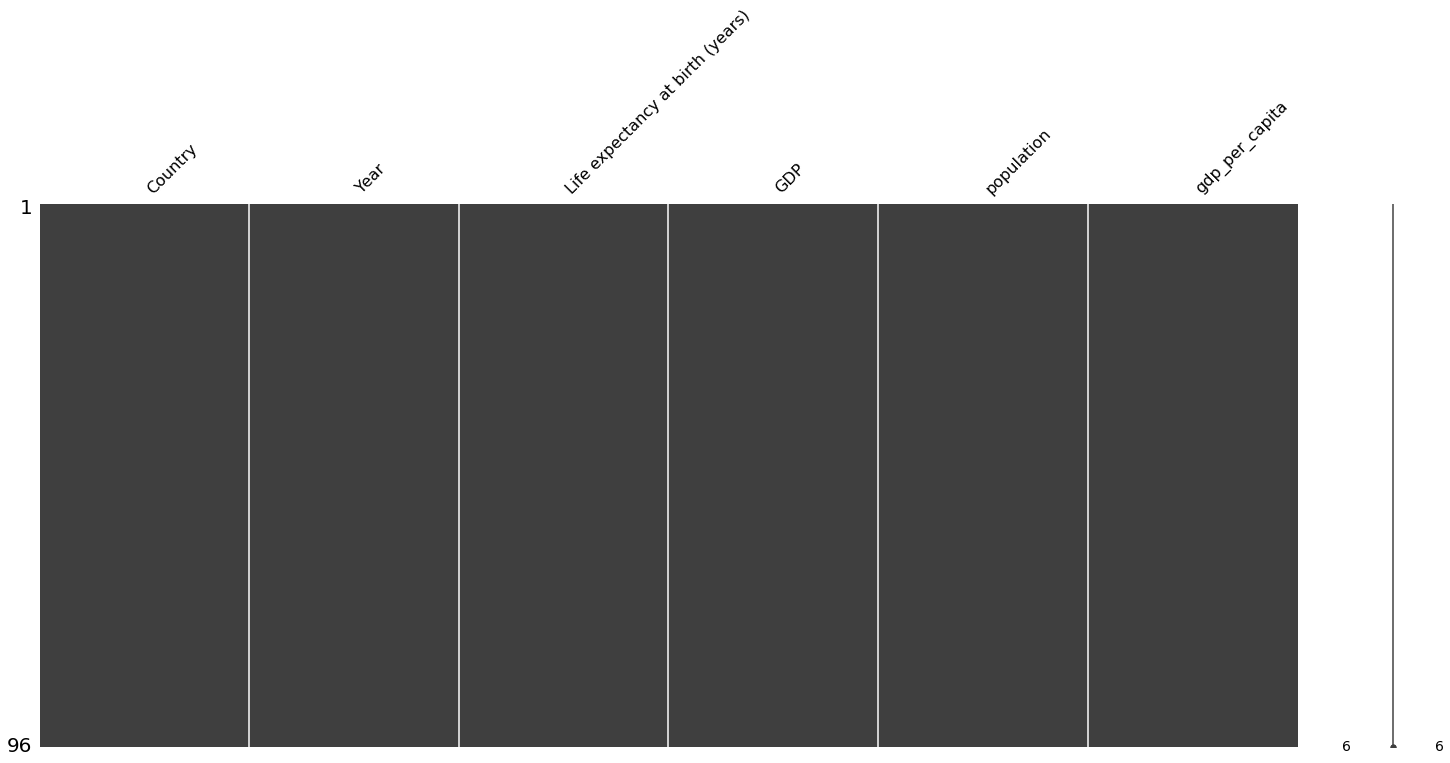

In [4]:
#Looking for missing data in the dataset
msno.matrix(df) 

In [5]:
#renaming columns 
df.rename(columns = {"Country" : "country", "Year" : "year", "Life expectancy at birth (years)" : "life_expentancy", "GDP" : "gdp"}, inplace = True)
df.head()

,country,year,life_expentancy,gdp,population,gdp_per_capita
0,Chile,2000,77.3,7.786093e+10,19116201,4073.033766
1,Chile,2001,77.3,7.097992e+10,19116201,3713.076880
2,Chile,2002,77.8,6.973681e+10,19116201,3648.047613
3,Chile,2003,77.9,7.564346e+10,19116201,3957.034132
4,Chile,2004,78.0,9.921039e+10,19116201,5189.859264


In [6]:
#exploring unique countries represented
df.country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

Text(0, 0.5, 'Life Expentancy at birth')

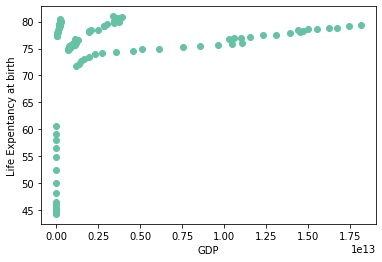

In [7]:
#scatter plot GDP and Life expectancy at birth
sns.set_palette("Set2")
plt.scatter(df.gdp, df.life_expentancy)
plt.xlabel('GDP')
plt.ylabel('Life Expentancy at birth')

<AxesSubplot:xlabel='gdp', ylabel='Density'>

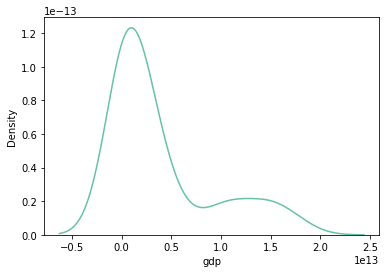

In [8]:
#plotting the distribution of GDP values
sns.set_palette("Set2")
sns.kdeplot(df.gdp)


Lower GDP values are not clearly represented in the above scatter plot as they are too low compared to other higher values. They all appear to be equal to 0.00. This is probably due to the different scales of the population sizes for the different countries. Let's calculate GDP per capita and scatter GDP per capita and Life expectancy

Text(0, 0.5, 'Life Expentancy at birth')

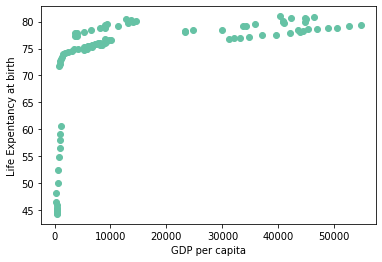

In [9]:
#scatter plot GDP per captira and Life expectancy at birth
sns.set_palette("Set2")
plt.scatter(df.gdp_per_capita, df.life_expentancy)
plt.xlabel('GDP per capita')
plt.ylabel('Life Expentancy at birth')

<AxesSubplot:xlabel='country', ylabel='gdp_per_capita'>

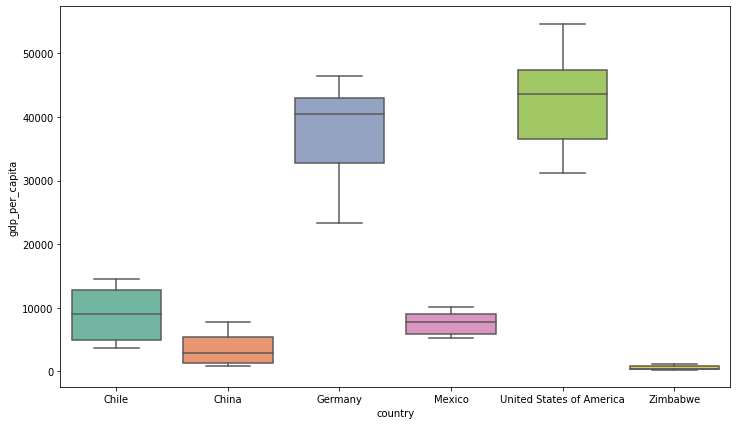

In [15]:
sns.set_palette("Set2")
plt.figure(figsize = (12, 7))
sns.boxplot(data = df, x = "country", y = "gdp_per_capita")

In [17]:
df[df.country == "Zimbabwe"]

,country,year,life_expentancy,gdp,population,gdp_per_capita
80,Zimbabwe,2000,46.0,6.689958e+09,14862924,450.110463
81,Zimbabwe,2001,45.3,6.777385e+09,14862924,455.992690
82,Zimbabwe,2002,44.8,6.342116e+09,14862924,426.707181
83,Zimbabwe,2003,44.5,5.727592e+09,14862924,385.361037
84,Zimbabwe,2004,44.3,5.805598e+09,14862924,390.609439
85,Zimbabwe,2005,44.6,5.755215e+09,14862924,387.219581
86,Zimbabwe,2006,45.4,5.443896e+09,14862924,366.273588
87,Zimbabwe,2007,46.6,5.291950e+09,14862924,356.050404
88,Zimbabwe,2008,48.2,4.415703e+09,14862924,297.095161
89,Zimbabwe,2009,50.0,8.621574e+09,14862924,580.072508


In [11]:
#creating one data frame per country

df_us = df[df.country == "United States of America"]
df_china = df[df.country == "China"]
df_ger = df[df.country == "Germany"]
df_mex = df[df.country == "Mexico"]
df_chile = df[df.country == "Chile"]
df_zim = df[df.country == "Zimbabwe"]

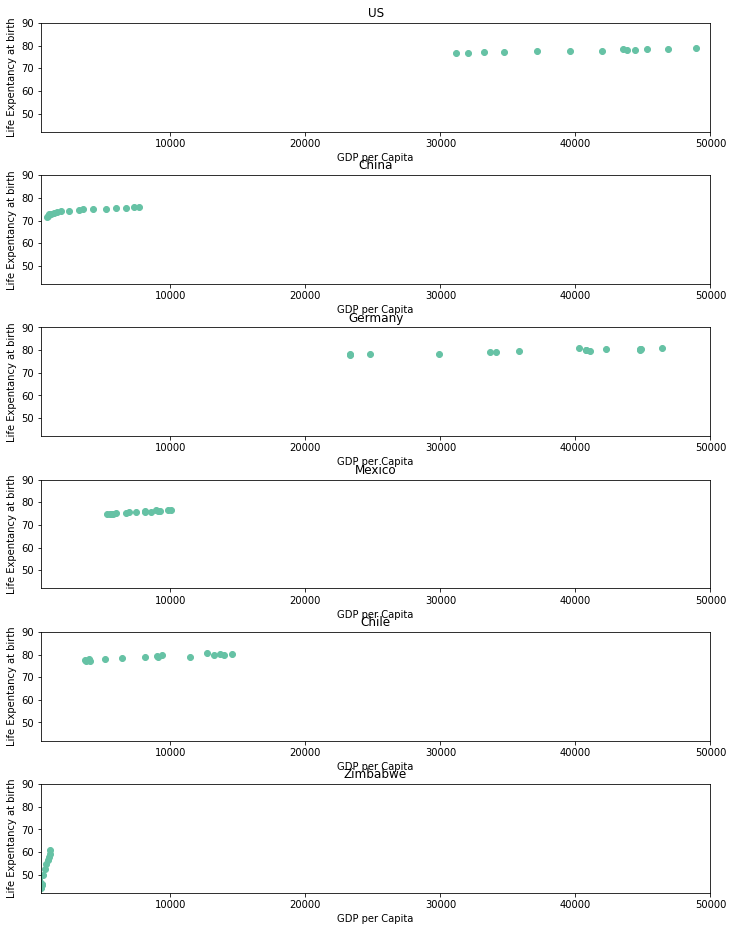

In [26]:
plt.figure(figsize = (12, 16))
sns.set_palette("Set2")

ax = plt.subplot(6, 1, 1)
plt.scatter(df_us.gdp_per_capita, df_us.life_expentancy)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expentancy at birth')
plt.title("US")
ax.axis([400, 50000, 42, 90])

ax = plt.subplot(6, 1, 2)
plt.scatter(df_china.gdp_per_capita, df_china.life_expentancy)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expentancy at birth')
plt.title("China")
ax.axis([400, 50000, 42, 90])


ax = plt.subplot(6, 1, 3)
plt.scatter(df_ger.gdp_per_capita, df_ger.life_expentancy)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expentancy at birth')
plt.title("Germany")
ax.axis([400, 50000, 42, 90])


ax = plt.subplot(6, 1, 4)
plt.scatter(df_mex.gdp_per_capita, df_mex.life_expentancy)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expentancy at birth')
plt.title("Mexico")
ax.axis([400, 50000, 42, 90])


ax = plt.subplot(6, 1, 5)
plt.scatter(df_chile.gdp_per_capita, df_chile.life_expentancy)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expentancy at birth')
plt.title("Chile")
ax.axis([400, 50000, 42, 90])


ax = plt.subplot(6, 1, 6)
plt.scatter(df_zim.gdp_per_capita, df_zim.life_expentancy)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expentancy at birth')
plt.title("Zimbabwe")
ax.axis([400, 50000, 42, 90])


plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

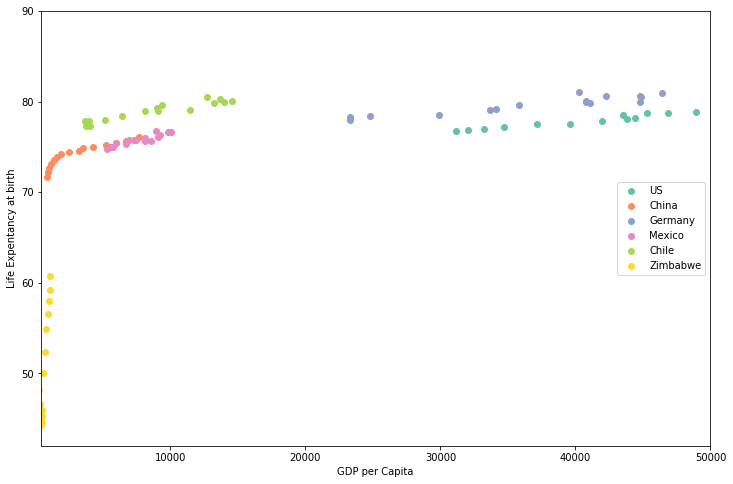

In [33]:
plt.figure(figsize = (12, 8))
sns.set_palette("Set2")
plt.axis([400, 50000, 42, 90])
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expentancy at birth')


plt.scatter(df_us.gdp_per_capita, df_us.life_expentancy, label = 'US')

plt.scatter(df_china.gdp_per_capita, df_china.life_expentancy, label = 'China')

plt.scatter(df_ger.gdp_per_capita, df_ger.life_expentancy, label = 'Germany')

plt.scatter(df_mex.gdp_per_capita, df_mex.life_expentancy, label = 'Mexico')

plt.scatter(df_chile.gdp_per_capita, df_chile.life_expentancy, label = 'Chile')

plt.scatter(df_zim.gdp_per_capita, df_zim.life_expentancy, label = 'Zimbabwe')

plt.legend(loc = 7)

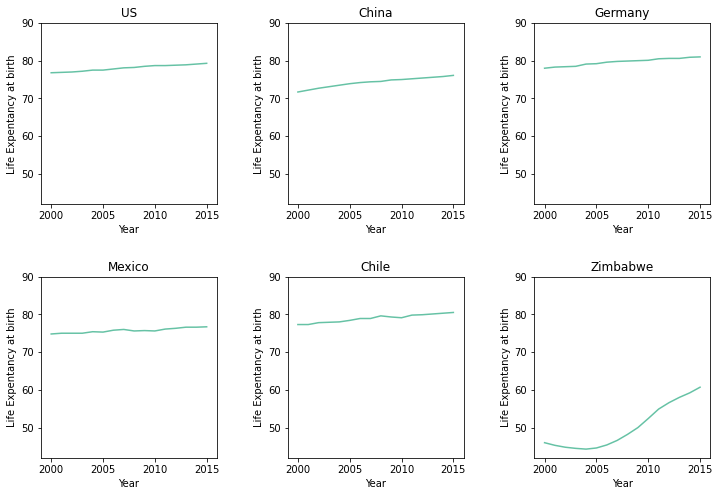

In [21]:
plt.figure(figsize = (12, 8))

ax = plt.subplot(2, 3, 1)
plt.plot(df_us.year, df_us.life_expentancy) 
plt.xlabel('Year')
plt.ylabel('Life Expentancy at birth')
plt.title("US")
ax.axis([1999, 2016, 42, 90])

ax = plt.subplot(2, 3, 2)
plt.plot(df_china.year, df_china.life_expentancy)
plt.xlabel('Year')
plt.ylabel('Life Expentancy at birth')
plt.title("China")
ax.axis([1999, 2016, 42, 90])

ax = plt.subplot(2, 3, 3)
plt.plot(df_ger.year, df_ger.life_expentancy)
plt.xlabel('Year')
plt.ylabel('Life Expentancy at birth')
plt.title("Germany")
ax.axis([1999, 2016, 42, 90])

ax = plt.subplot(2, 3, 4)
plt.plot(df_mex.year, df_mex.life_expentancy)
plt.xlabel('Year')
plt.ylabel('Life Expentancy at birth')
plt.title("Mexico")
ax.axis([1999, 2016, 42, 90])

ax = plt.subplot(2, 3, 5)
plt.plot(df_chile.year, df_chile.life_expentancy)
plt.xlabel('Year')
plt.ylabel('Life Expentancy at birth')
plt.title("Chile")
ax.axis([1999, 2016, 42, 90])

ax = plt.subplot(2, 3, 6)
plt.plot(df_zim.year, df_zim.life_expentancy)
plt.xlabel('Year')
plt.ylabel('Life Expentancy at birth')
plt.title("Zimbabwe")
ax.axis([1999, 2016, 42, 90])

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

(-0.5, 5.5, 45.0, 85.0)

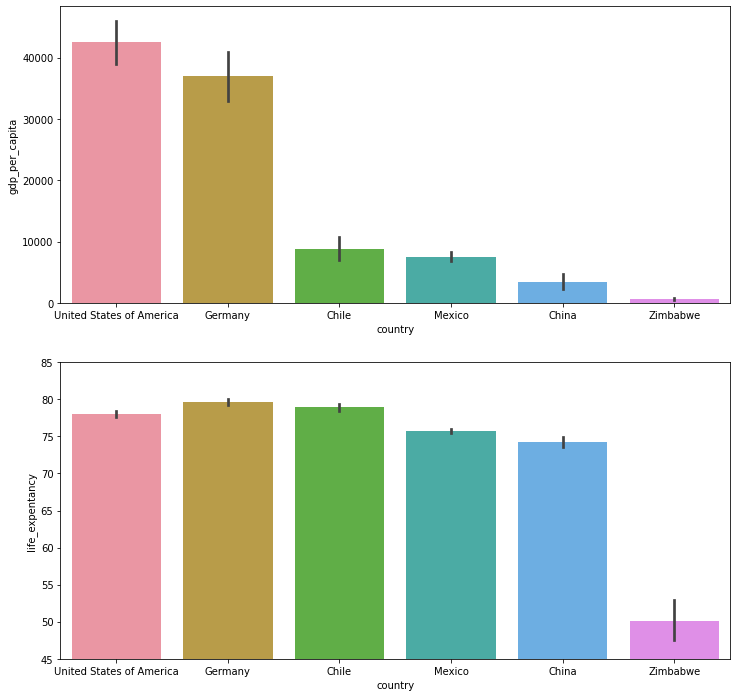

In [14]:
#barplot with average GDP per capita per country
plt.figure(figsize = (12, 12))

plt.subplot(2, 1, 1)
sns.set_palette("Purples", 5)
sns.barplot(data = df, x = "country", y = "gdp_per_capita", order = ["United States of America", "Germany", "Chile", "Mexico", "China", "Zimbabwe"])

ax = plt.subplot(2, 1, 2)
sns.set_palette("Purples", 5)
sns.barplot(data = df, x = "country", y = "life_expentancy", order = ["United States of America", "Germany", "Chile", "Mexico", "China", "Zimbabwe"])

ax.axis([-0.5, 5.5, 45, 85])